In [2]:
import cv2
import numpy as np
from os import listdir
from os.path import join, isfile
from collections import OrderedDict
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from projeto_helper import BeerClassification

PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [2]:
bc = BeerClassification(PATH, ['0', '1', '2'])
query_img = bc.getImage(bc.imgs[0])
train_img = bc.getImage(bc.imgs[60])
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v0_0.jpg
1 0_v0_45L.jpg
2 0_v0_45R.jpg
3 0_v10_0.jpg
4 0_v10_45L.jpg
5 0_v10_45R.jpg
6 0_v11_0.jpg
7 0_v11_45L.jpg
8 0_v11_45R.jpg
9 0_v12_0.jpg
10 0_v12_45L.jpg
11 0_v12_45R.jpg
12 0_v1_0.jpg
13 0_v1_45L.jpg
14 0_v1_45R.jpg
15 0_v2_0.jpg
16 0_v2_45L.jpg
17 0_v2_45R.jpg
18 0_v3_0.jpg
19 0_v3_45L.jpg
20 0_v3_45R.jpg
21 0_v4_0.jpg
22 0_v4_45L.jpg
23 0_v4_45R.jpg
24 0_v5_0.jpg
25 0_v5_45L.jpg
26 0_v5_45R.jpg
27 0_v6_0.jpg
28 0_v6_45L.jpg
29 0_v6_45R.jpg
30 0_v7_0.jpg
31 0_v7_45L.jpg
32 0_v7_45R.jpg
33 0_v8_0.jpg
34 0_v8_45L.jpg
35 0_v8_45R.jpg
36 0_v9_0.jpg
37 0_v9_45L.jpg
38 0_v9_45R.jpg
39 1_v0_0.jpg
40 1_v0_45L.jpg
41 1_v0_45R.jpg
42 1_v1_0.jpg
43 1_v1_45L.jpg
44 1_v1_45R.jpg
45 1_v2_0.jpg
46 1_v2_45L.jpg
47 1_v2_45R.jpg
48 1_v3_0.jpg
49 1_v3_45L.jpg
50 1_v3_45R.jpg
51 1_v4_0.jpg
52 1_v4_45L.jpg
53 1_v4_45R.jpg
54 1_v5_0.jpg
55 1_v5_45L.jpg
56 1_v5_45R.jpg
57 1_v6_0.jpg
58 1_v6_45L.jpg
59 1_v6_45R.jpg
60 1_v7_0.jpg
61 1_v7_45L.jpg
62 1_v7_45R.jpg
63 2_v0_0.jpg
64 2_v0_45L.jpg
65 2_

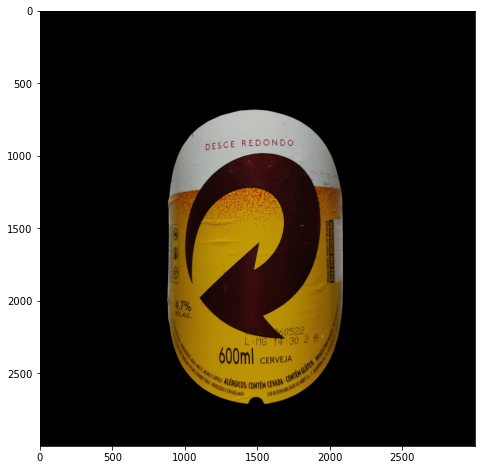

In [3]:
mask = plt.imread(join(PATH, 'mask0.jpg'))
query_img_m = cv2.bitwise_and(query_img, mask)

plt.figure(figsize=(8, 8))
plt.imshow(query_img_m)
plt.show()

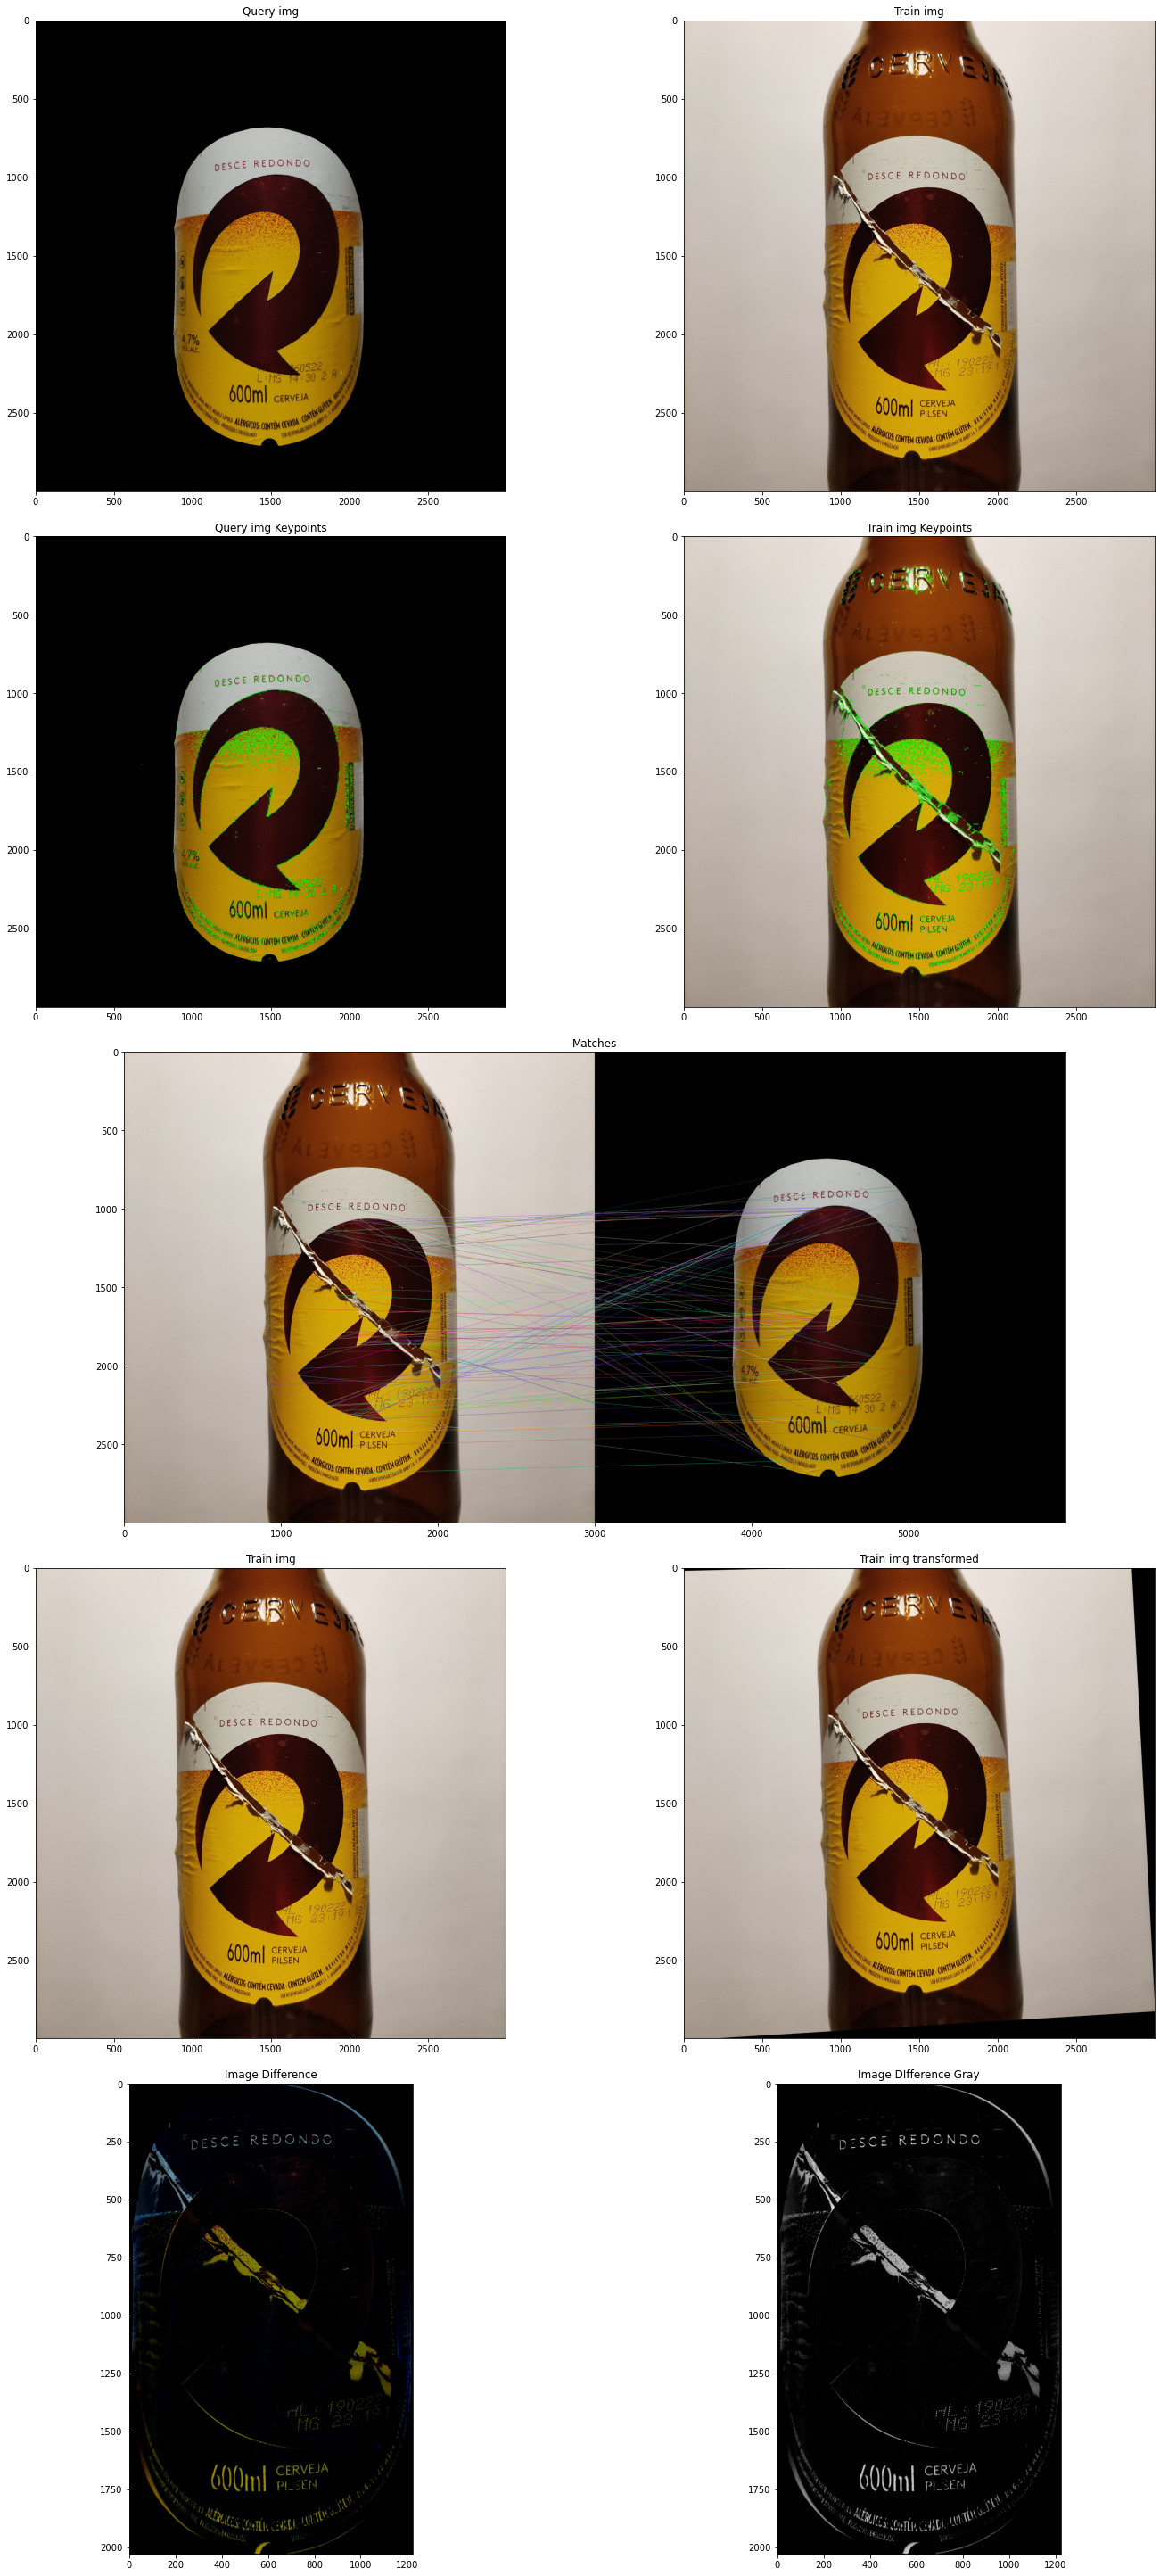

In [4]:
img_diff_m = bc.processGetDiff(query_img_m, train_img, plot=True)

# Analise de Histograma Exemplo

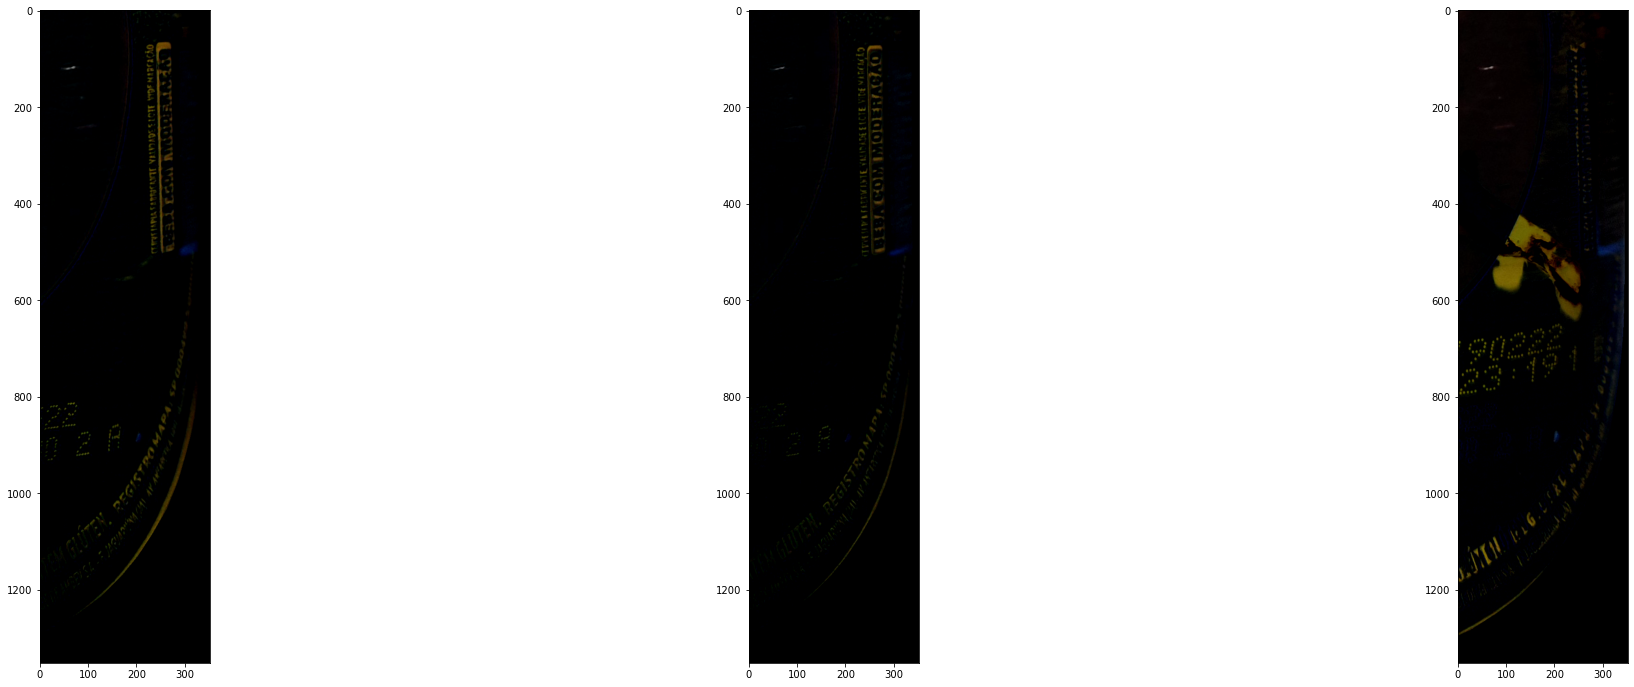

In [5]:
query_img_good = bc.getImage(bc.imgs[0])
query_img_good_m = cv2.bitwise_and(query_img_good, mask)
train_img_good_1 = bc.getImage(bc.imgs[3])
train_img_good_2 = bc.getImage(bc.imgs[36])
train_img_bad = bc.getImage(bc.imgs[39])

img_diff_good_1 = bc.processGetDiff(query_img_good_m, train_img_good_1)
img_diff_good_2 = bc.processGetDiff(query_img_good_m, train_img_good_2)
img_diff_bad = bc.processGetDiff(query_img_good_m, train_img_bad)

img_diff_good_1 = bc.trim(img_diff_good_1)
img_diff_good_2 = bc.trim(img_diff_good_2)
img_diff_bad = bc.trim(img_diff_bad)

fig, axs = plt.subplots(1, 3, figsize=(36, 12))
axs[0].imshow(img_diff_good_1)
axs[1].imshow(img_diff_good_2)
axs[2].imshow(img_diff_bad)
plt.show()

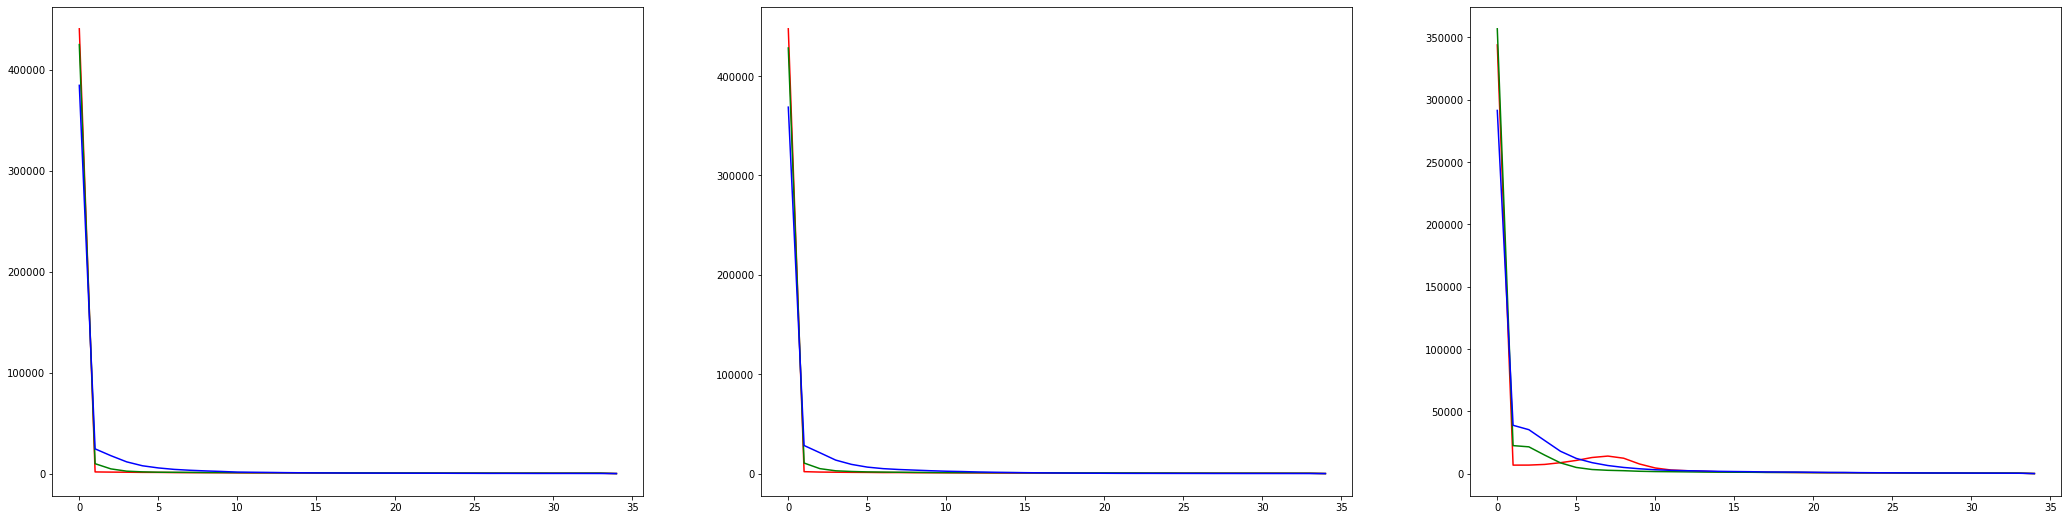

Correlacao entre histogramas
0: 0.005 - 0.231 = -0.226
1: 0.012 - 0.156 = -0.144
2: 0.037 - 0.155 = -0.118


In [6]:
hist_good_1 = []
hist_good_2 = []
hist_bad = []

fig, axs = plt.subplots(1, 3, figsize=(36, 9))
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist_1 = cv2.calcHist([img_diff_good_1], [i], None, [35], [0, 34])
    hist_2 = cv2.calcHist([img_diff_good_2], [i], None, [35], [0, 34])
    hist_3 = cv2.calcHist([img_diff_bad], [i], None, [35], [0, 34])
    hist_good_1.append(hist_1)
    hist_good_2.append(hist_2)
    hist_bad.append(hist_3)
    axs[0].plot(hist_1, color=col)
    axs[1].plot(hist_2, color=col)
    axs[2].plot(hist_3, color=col)
plt.show()

print('Correlacao entre histogramas')
for i, col in enumerate(color):
    corr_good = cv2.compareHist(hist_good_1[i], hist_good_2[i], cv2.HISTCMP_BHATTACHARYYA)
    corr_bad = cv2.compareHist(hist_good_1[i], hist_bad[i], cv2.HISTCMP_BHATTACHARYYA)
    print(f'{i}: {corr_good:.3f} - {corr_bad:.3f} = {corr_good - corr_bad:.3f}' )

# Analise de Histograma Resultados

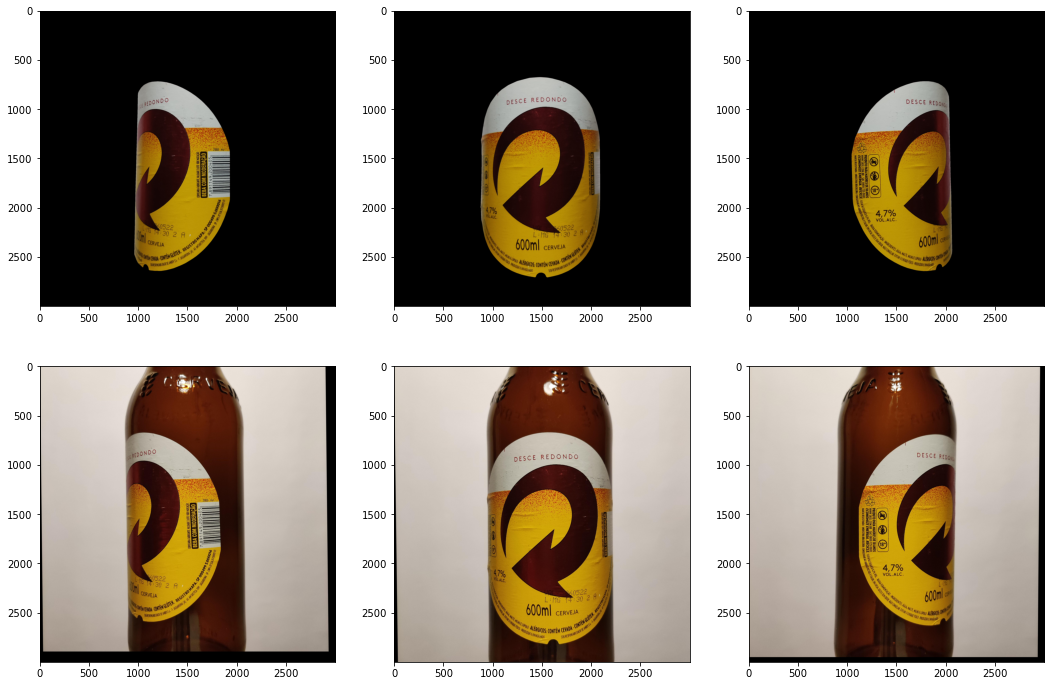

In [7]:
bc = BeerClassification(PATH, ids=['0', '1', '2'])

query_img_0 = bc.getImage(bc.imgs[0])
query_img_45L = bc.getImage(bc.imgs[1])
query_img_45R = bc.getImage(bc.imgs[2])

mask_0 = plt.imread(join(PATH, 'mask0.jpg'))
mask_45L = plt.imread(join(PATH, 'mask45L.jpg'))
mask_45R = plt.imread(join(PATH, 'mask45R.jpg'))

query_img_0_m = cv2.bitwise_and(query_img_0, mask_0)
query_img_45L_m = cv2.bitwise_and(query_img_45L, mask_45L)
query_img_45R_m = cv2.bitwise_and(query_img_45R, mask_45R)

train_img_0 = bc.getImage(bc.imgs[3])
train_img_45L = bc.getImage(bc.imgs[4])
train_img_45R = bc.getImage(bc.imgs[5])

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(query_img_45L_m)
axs[0, 1].imshow(query_img_0_m)
axs[0, 2].imshow(query_img_45R_m)
axs[1, 0].imshow(train_img_45L)
axs[1, 1].imshow(train_img_0)
axs[1, 2].imshow(train_img_45R)
plt.show()

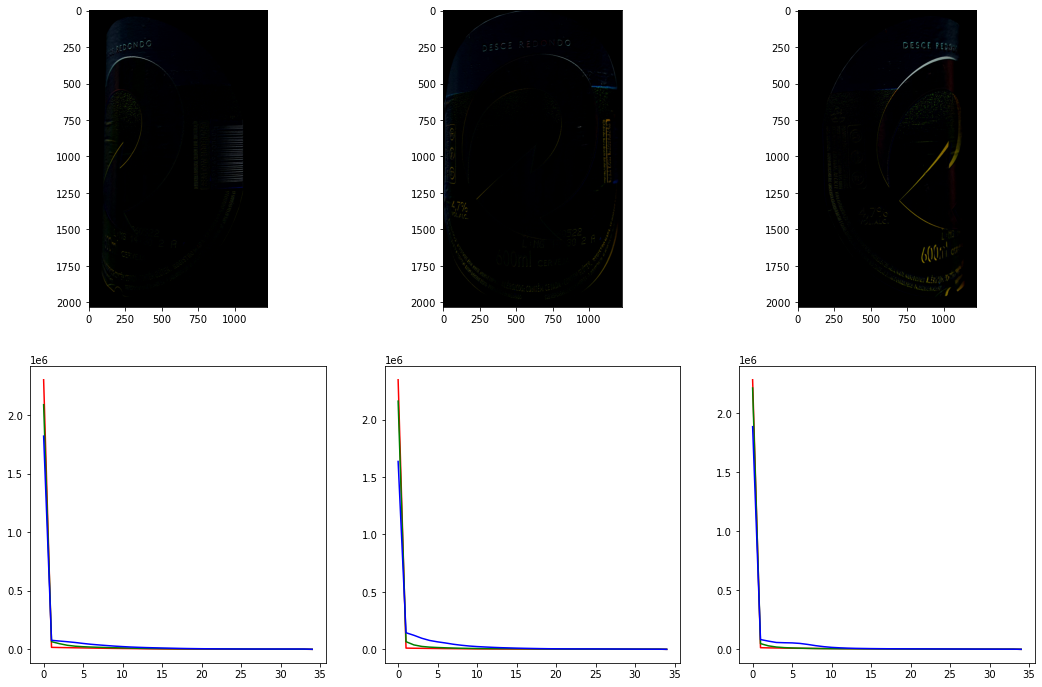

In [8]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)

hist_size = [35]
ranges = [0, 34]
color = ('r', 'g', 'b')
hist_0 = []
hist_45L = []
hist_45R = []
for i, col in enumerate(color):
    hist_0.append(cv2.calcHist([img_diff_0], [i], None, hist_size, ranges))
    hist_45L.append(cv2.calcHist([img_diff_45L], [i], None, hist_size, ranges))
    hist_45R.append(cv2.calcHist([img_diff_45R], [i], None, hist_size, ranges))
    
    axs[1, 0].plot(hist_45L[i], color=col)
    axs[1, 1].plot(hist_0[i], color=col)
    axs[1, 2].plot(hist_45R[i], color=col)
plt.show()

In [9]:
results_0 = bc.compareHistogramAllImages(query_img_0_m, 0, hist_0, hist_size, ranges)
results_45L = bc.compareHistogramAllImages(query_img_45L_m, 0, hist_45L, hist_size, ranges)
results_45R = bc.compareHistogramAllImages(query_img_45R_m, 0, hist_45R, hist_size, ranges)

acc_0 = bc.predictAndScoreSVM(results_0)
acc_45L = bc.predictAndScoreSVM(results_45L)
acc_45R = bc.predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

Acc 45L: 0.44
Acc 0:   0.8
Acc 45R: 0.4


# Limiarizacao

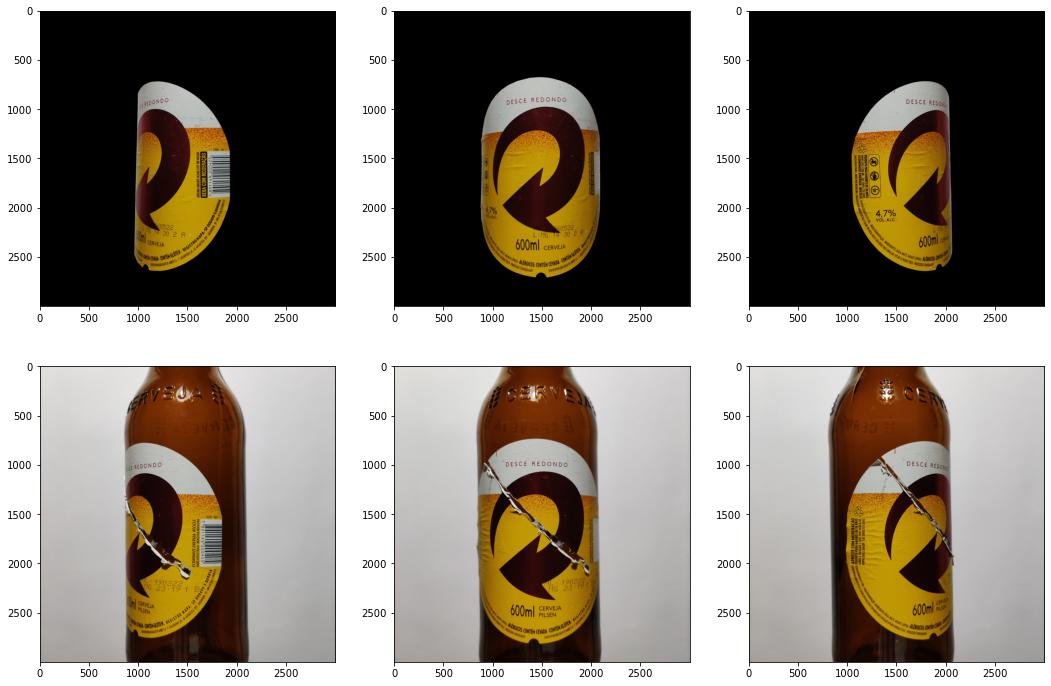

In [3]:
bc = BeerClassification(PATH, ids=['0', '1', '2'])

query_img_0 = bc.getImage(bc.imgs[0])
query_img_45L = bc.getImage(bc.imgs[1])
query_img_45R = bc.getImage(bc.imgs[2])

mask_0 = plt.imread(join(PATH, 'mask0.jpg'))
mask_45L = plt.imread(join(PATH, 'mask45L.jpg'))
mask_45R = plt.imread(join(PATH, 'mask45R.jpg'))

query_img_0_m = cv2.bitwise_and(query_img_0, mask_0)
query_img_45L_m = cv2.bitwise_and(query_img_45L, mask_45L)
query_img_45R_m = cv2.bitwise_and(query_img_45R, mask_45R)

train_img_0 = bc.getImage(bc.imgs[39])
train_img_45L = bc.getImage(bc.imgs[40])
train_img_45R = bc.getImage(bc.imgs[41])

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(query_img_45L_m)
axs[0, 1].imshow(query_img_0_m)
axs[0, 2].imshow(query_img_45R_m)
axs[1, 0].imshow(train_img_45L)
axs[1, 1].imshow(train_img_0)
axs[1, 2].imshow(train_img_45R)
plt.show()

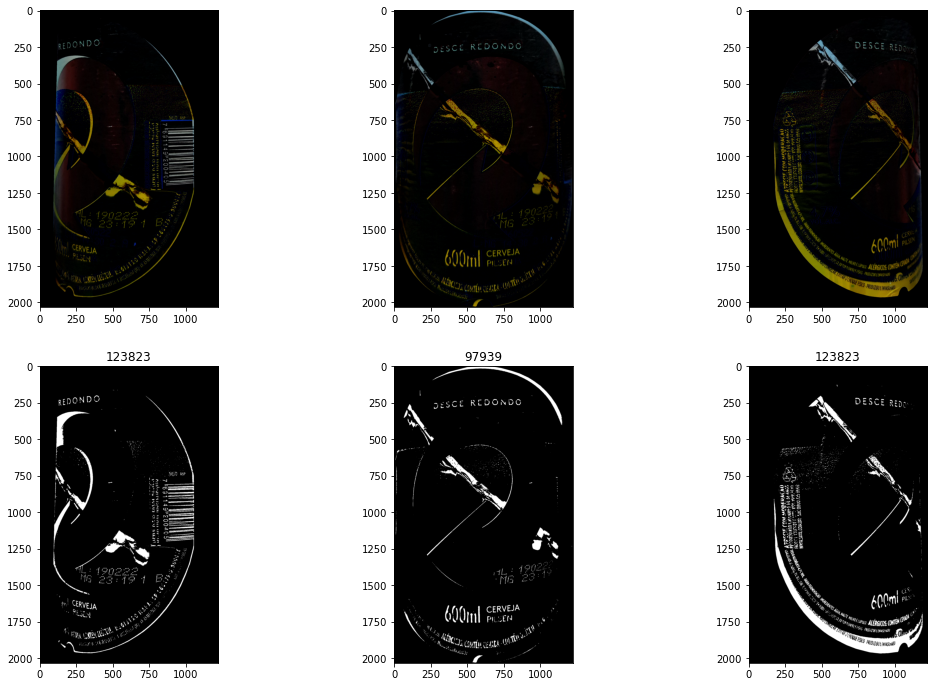

In [4]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R)

img_diff_0_gray = cv2.cvtColor(img_diff_0, cv2.COLOR_RGB2GRAY)
img_diff_45L_gray = cv2.cvtColor(img_diff_45L, cv2.COLOR_RGB2GRAY)
img_diff_45R_gray = cv2.cvtColor(img_diff_45R, cv2.COLOR_RGB2GRAY)

threshold_value = 50
_, img_diff_0_t = cv2.threshold(img_diff_0_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45L_t = cv2.threshold(img_diff_45L_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45R_t = cv2.threshold(img_diff_45R_gray, threshold_value, 1, cv2.THRESH_BINARY)

sum_0 = np.sum(img_diff_0_t)
sum_45L = np.sum(img_diff_45L_t)
sum_45R = np.sum(img_diff_45R_t)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)
axs[1, 0].imshow(img_diff_45L_t, 'gray')
axs[1, 1].imshow(img_diff_0_t, 'gray')
axs[1, 2].imshow(img_diff_45R_t, 'gray')
axs[1, 0].set_title(sum_45L)
axs[1, 1].set_title(sum_0)
axs[1, 2].set_title(sum_45L)
plt.show()

In [5]:
results_0 = bc.thresholdAllImages(query_img_0_m, 0)
results_45L = bc.thresholdAllImages(query_img_45L_m, 1)
results_45R = bc.thresholdAllImages(query_img_45R_m, 2)

acc_0 = bc.predictAndScoreThreshold(results_0)
acc_45L = bc.predictAndScoreThreshold(results_45L)
acc_45R = bc.predictAndScoreThreshold(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)